# Document Classification Using Different Word Embeddings With LDA.

# Data:
The Consumer Complaint Database is a collection of complaints about consumer financial products and services that we sent to companies for response. Complaints are published after the company responds, confirming a commercial relationship with the consumer, or after 15 days, whichever comes first.

# Libraries:
Pandas, Numpy, NLTK, Sklearn, Gensim, PyLDA, Matplotlib, Regx.
  
# Word Embeddings:
1.BagOfWords

2.TFIDF

In [1]:
# Librabies

import nltk
import pandas as pd
import numpy as np
import re
import os
import string
import gensim
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords = nltk.corpus.stopwords.words('english')
from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import pyLDAvis
import pyLDAvis.gensim
from gensim.models import CoherenceModel
from gensim import corpora, models
from pprint import pprint
from gensim.models import Word2Vec
from sklearn.preprocessing import MinMaxScaler
from gensim.test.utils import common_texts
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Data import from local device.
df=pd.read_csv(r"C:\Users\Praveen\Downloads\complaints.csv")

In [3]:
#Data preview
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,11/23/20,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company believes it acted appropriately as aut...,"Professional Debt Mediation, Inc.",None,None,None,NaN,Phone,11/23/20,Closed with explanation,Yes,NaN,3970396
1,09/15/20,Credit card or prepaid card,General-purpose credit card or charge card,Getting a credit card,Card opened as result of identity theft or fraud,NaN,None,JPMORGAN CHASE & CO.,AR,72703,None,Consent not provided,Web,09/22/20,Closed with explanation,Yes,NaN,3847038
2,04/09/20,Debt collection,Medical debt,Written notification about debt,Didn't receive enough information to verify debt,NaN,None,"EQUIFAX, INC.",TX,75149,None,Consent not provided,Web,04/13/20,Closed with explanation,Yes,NaN,3599193
3,12/03/20,Vehicle loan or lease,Loan,Managing the loan or lease,Problem with additional products or services p...,NaN,None,ALLY FINANCIAL INC.,IL,601XX,Servicemember,None,Web,12/03/20,In progress,Yes,NaN,3987386
4,11/12/20,Checking or savings account,Checking account,Problem caused by your funds being low,Non-sufficient funds and associated fees,NaN,None,"HUNTINGTON NATIONAL BANK, THE",PA,161XX,None,None,Web,11/12/20,In progress,Yes,NaN,3949674


In [4]:
df.shape

(141914, 18)

In [5]:
prod_comp = df[['Consumer complaint narrative','Product']]

In [6]:
prod_comp

,Consumer complaint narrative,Product
0,NaN,Debt collection
1,NaN,Credit card or prepaid card
2,NaN,Debt collection
3,NaN,Vehicle loan or lease
4,NaN,Checking or savings account
...,...,...
141909,I have a debt with CB1 Collections Agency. I c...,Debt collection
141910,XXXX XXXX XXXX transferred my loan to Select P...,Mortgage
141911,I made a purchase for a XXXX XXXX XXXXXXXX for...,Credit card or prepaid card
141912,Upon Checking my credit report. I noticed XXXX...,Debt collection


In [7]:
prod_comp.isnull().sum()

Consumer complaint narrative    80119
Product                             0
dtype: int64

In [8]:
prod_comp.dropna(inplace=True)

In [9]:
prod_comp.isnull().sum()

Consumer complaint narrative    0
Product                         0
dtype: int64

In [10]:
prod_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61795 entries, 13 to 141912
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Consumer complaint narrative  61795 non-null  object
 1   Product                       61795 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [11]:
prod_comp.head()

,Consumer complaint narrative,Product
13,"XXXX XXXX XXXX XXXX XXXX XXXX XXXX, GA XXXX PO...",Debt collection
14,Not only was I never given the chance to dispu...,Debt collection
17,"Capitol-One "" GM CARD '' MasterCard ( former )...",Credit card or prepaid card
19,The mortgage was transferred twice and Freedom...,Mortgage
21,I was going through my credit report and notic...,Debt collection


<AxesSubplot:>

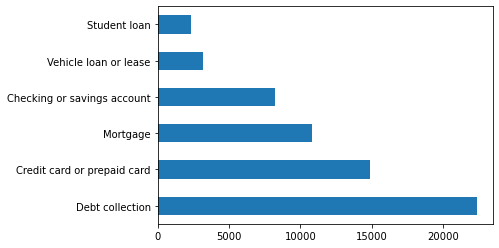

In [12]:
prod_comp['Product'].value_counts().plot(kind = 'barh')

In [13]:
complaints=prod_comp['Consumer complaint narrative']

Here we are are using only complaints column from data set.

In [14]:
complaints.shape

(61795,)

We are using 61795 complaints which are documents.

In [15]:
print(complaints)

13        XXXX XXXX XXXX XXXX XXXX XXXX XXXX, GA XXXX PO...
14        Not only was I never given the chance to dispu...
17        Capitol-One " GM CARD '' MasterCard ( former )...
19        The mortgage was transferred twice and Freedom...
21        I was going through my credit report and notic...
                                ...                        
141908    I have never had a credit card with Capital On...
141909    I have a debt with CB1 Collections Agency. I c...
141910    XXXX XXXX XXXX transferred my loan to Select P...
141911    I made a purchase for a XXXX XXXX XXXXXXXX for...
141912    Upon Checking my credit report. I noticed XXXX...
Name: Consumer complaint narrative, Length: 61795, dtype: object


In [16]:
complaints = complaints.sample(n=30000)

In [17]:
pd.set_option('display.max_colwidth',-1)
complaints

124404    My long standing credit card account with Capital One was closed on XX/XX/2020. I called immediately upon receipt of the email notifying me of the cancellation. I called to ask them to reopen it, but they wouldn't. I am simplifying my finances and moving everything to capitol one, but this prevents me from doing so. I tried to reapply for the same card, but was denied. I'm a customer of 8 years, have more than 10k with them, and they won't reconsider their decision. Right now, I have 3 accounts I just setup to auto pay to my credit card, but it won't work because they closed it. I was not notified ahead of time about the account closing.                                                                                                                                                                                                                                                                                                                                                         

# Text Cleaning:
Used regx for replacing and removing speacial letters.

Removed stops words from text using NLTK.

Removed words less than 3 letters.

Lowered all the letters.



In [18]:
docs = complaints 
def cleaning_text(text):
    test = text.replace('\n', ' ') 
    test = test.replace('\t', ' ')
    test = test.replace('X', ' ')    
    test = re.sub('[^a-zA-Z]', ' ', test)
    test = re.sub(' +', ' ', test)
    test = test.lower()
    row_words = test.split(' ') 
    row_words = [i for i in row_words if len(i)>2]
    row_text = [i for i in row_words if i not in stopwords] 
    return ' '.join(row_text)
docs_clean = docs.apply(lambda v: cleaning_text(v))

In [19]:
docs_clean.head(1)

124404    long standing credit card account capital one closed called immediately upon receipt email notifying cancellation called ask reopen simplifying finances moving everything capitol one prevents tried reapply card denied customer years reconsider decision right accounts setup auto pay credit card work closed notified ahead time account closing
Name: Consumer complaint narrative, dtype: object

This is how data looks after text cleaning process

In [20]:
cleaned_text=[i for i in docs_clean if len(i)!=0]

In [21]:
doc_lens = [len(d) for d in cleaned_text]

print("Document word count")

print("Min:",(round(np.min(doc_lens))))

print("Mean:",(round(np.mean(doc_lens)))),

print("Median:",(round(np.median(doc_lens)))),

print("Max:",(round(np.max(doc_lens))))

Document word count
Min: 4
Mean: 709
Median: 489
Max: 19893


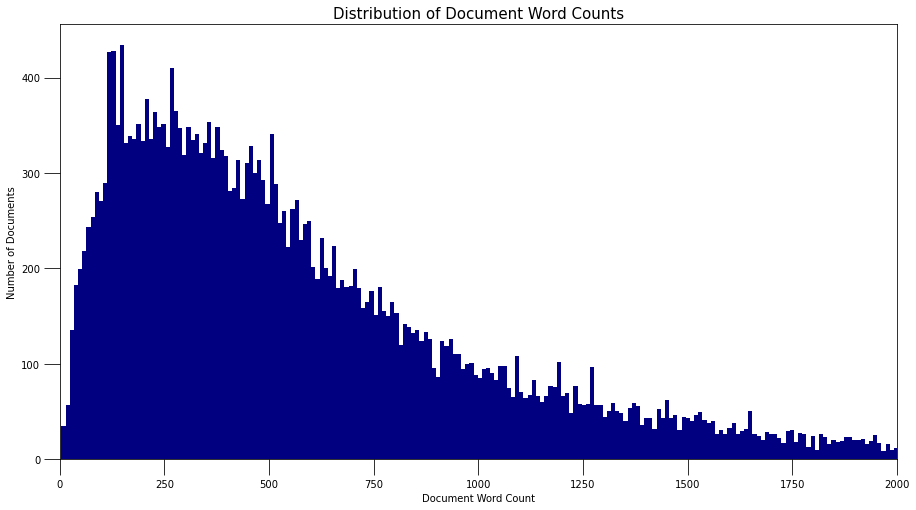

In [22]:
plt.figure(figsize=(15,8))
plt.hist(doc_lens, bins = 2000, color='navy')
plt.gca().set(xlim=(0, 2000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,2000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=15))
plt.show()

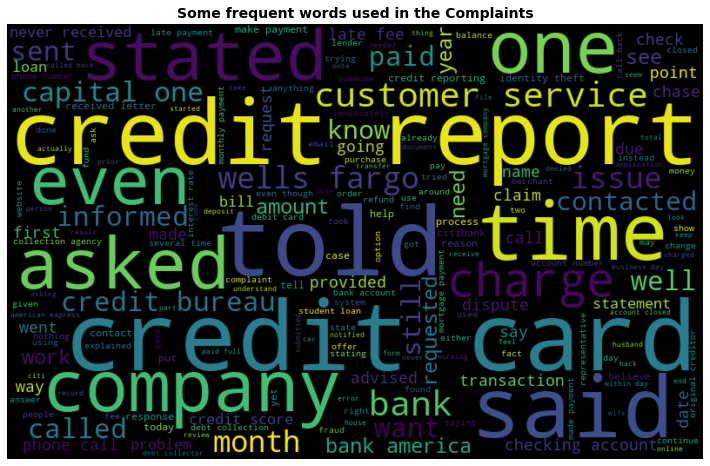

In [23]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(cleaned_text))
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Some frequent words used in the Complaints", weight='bold', fontsize=14)
plt.show()

In [24]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence)))

words = list(sent_to_words(cleaned_text))

print(words[1:2])

[['sent', 'letter', 'dispute', 'debt', 'macy', 'department', 'card', 'attempted', 'contact', 'company', 'unable', 'make', 'contact', 'representatives', 'year', 'reached', 'representative', 'telephone', 'number', 'told', 'longer', 'managing', 'account', 'need', 'contact', 'macy', 'detail', 'unable', 'get', 'complete', 'account', 'number']]


In [25]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [26]:
# Initialize spacy ‘en’ model, keeping only tagger component (for efficiency)
# python -m spacy download en
import en_core_web_sm
nlp = en_core_web_sm.load()
# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(words, allowed_postags=['NOUN', 'VERB']) #select noun and verb

In [27]:
data_words = list(sent_to_words(data_lemmatized))

print(data_words[1:2])

[['send', 'letter', 'dispute', 'debt', 'macy', 'department', 'card', 'attempt', 'contact', 'company', 'make', 'contact', 'representative', 'year', 'reach', 'telephone', 'number', 'tell', 'manage', 'account', 'need', 'contact', 'macy', 'detail', 'get', 'account', 'number']]


Using Gensim utils tokenized the sentences in the documents and made into list form.

Those tokens are changed to dictionary form using gensim corpora.

And then into Term Document Frequency.

In [28]:
id2word = gensim.corpora.Dictionary(data_words)
# Create a Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[0])

[(0, 3), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 3), (8, 2), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1)]


In [29]:
for k,v in id2word.items():
    print(k,v)

0 account
1 ask
2 auto
3 call
4 cancellation
5 capital
6 capitol
7 card
8 close
9 closing
10 credit
11 customer
12 decision
13 deny
14 email
15 finance
16 move
17 notify
18 pay
19 prevent
20 reapply
21 receipt
22 reconsider
23 reopen
24 right
25 setup
26 simplify
27 stand
28 time
29 try
30 work
31 year
32 attempt
33 company
34 contact
35 debt
36 department
37 detail
38 dispute
39 get
40 letter
41 macy
42 make
43 manage
44 need
45 number
46 reach
47 representative
48 send
49 telephone
50 tell
51 ability
52 accrue
53 act
54 activity
55 addition
56 agent
57 amount
58 assist
59 assistance
60 balance
61 banner
62 become
63 begin
64 believe
65 break
66 bureau
67 business
68 care
69 charge
70 closure
71 collect
72 congress
73 consumer
74 coronavirus
75 creditor
76 deal
77 debtor
78 devise
79 discuss
80 emergency
81 explain
82 express
83 file
84 forbearance
85 forbid
86 give
87 governor
88 harm
89 impact
90 interest
91 know
92 knowledge
93 law
94 let
95 lieu
96 lift
97 link
98 log
99 maintain


1092 energy
1093 fault
1094 god
1095 going
1096 insulting
1097 label
1098 loandepot
1099 measure
1100 mind
1101 mistaken
1102 overdraw
1103 possibility
1104 processor
1105 read
1106 register
1107 repair
1108 side
1109 surround
1110 toll
1111 tomorrow
1112 wear
1113 chat
1114 machine
1115 pin
1116 apartment
1117 arrest
1118 beg
1119 build
1120 confession
1121 escort
1122 kid
1123 plead
1124 reside
1125 summer
1126 uncle
1127 watch
1128 incompetence
1129 newrez
1130 payoff
1131 arrive
1132 conclusion
1133 deliver
1134 depend
1135 disregard
1136 executive
1137 finalize
1138 ftc
1139 issuer
1140 laptop
1141 last
1142 package
1143 premise
1144 refer
1145 shipment
1146 track
1147 agreement
1148 alarm
1149 appointment
1150 arm
1151 beep
1152 button
1153 chance
1154 courtesy
1155 discount
1156 door
1157 equipment
1158 exist
1159 install
1160 mislead
1161 model
1162 monitoring
1163 noise
1164 perfection
1165 scamme
1166 technician
1167 termination
1168 trouble
1169 troubleshoot
1170 upgrade
117

1783 suspicion
1784 theloan
1785 tracker
1786 trigger
1787 underwrite
1788 underwriting
1789 vacation
1790 grandfathere
1791 mediate
1792 midland
1793 college
1794 summon
1795 textbook
1796 children
1797 frustrate
1798 incentive
1799 macys
1800 pressure
1801 complexity
1802 examine
1803 extort
1804 merit
1805 symptom
1806 clearing
1807 comp
1808 street
1809 tnis
1810 victoria
1811 chair
1812 florida
1813 society
1814 straightforward
1815 conduct
1816 interstate
1817 magazine
1818 publisher
1819 clash
1820 dump
1821 expedite
1822 injure
1823 motor
1824 nmac
1825 tear
1826 titan
1827 usp
1828 yield
1829 accident
1830 aspect
1831 attend
1832 browse
1833 celebration
1834 countdown
1835 dream
1836 evening
1837 fight
1838 foreigner
1839 here
1840 injury
1841 input
1842 midnight
1843 online
1844 pls
1845 ppl
1846 regulate
1847 scroll
1848 shopping
1849 smartphone
1850 swear
1851 travesty
1852 truth
1853 wake
1854 wallet
1855 world
1856 bofa
1857 hippa
1858 obligate
1859 breakdown
1860 burden


2469 cancelation
2470 deed
2471 heart
2472 kindness
2473 overlook
2474 remodel
2475 arrogance
2476 brazen
2477 fane
2478 frau
2479 stranger
2480 telecheck
2481 trs
2482 unhappy
2483 charging
2484 re
2485 salary
2486 calculator
2487 gateway
2488 santander
2489 contractor
2490 grass
2491 hunter
2492 kitchen
2493 landlord
2494 leaking
2495 leaving
2496 paint
2497 painting
2498 rain
2499 roof
2500 roofing
2501 tile
2502 utility
2503 warfield
2504 combative
2505 gather
2506 harassing
2507 monroe
2508 virginia
2509 fragile
2510 labor
2511 boyfriend
2512 cashapp
2513 interaction
2514 situaion
2515 american
2516 crash
2517 devastate
2518 discrimination
2519 doc
2520 obsurd
2521 planning
2522 pre
2523 range
2524 abide
2525 detriment
2526 rely
2527 kansa
2528 statue
2529 manipulation
2530 homebridge
2531 lapse
2532 bait
2533 invade
2534 privacy
2535 abet
2536 confiscate
2537 compassion
2538 therapy
2539 bird
2540 pile
2541 detailsper
2542 myright
2543 petition
2544 reverseit
2545 specificwrong
2

3139 deficiency
3140 dwell
3141 key
3142 kickback
3143 mountain
3144 newspaper
3145 projection
3146 quaritein
3147 rev
3148 substitution
3149 successor
3150 zip
3151 hook
3152 intervention
3153 pirate
3154 shark
3155 surcharge
3156 tennis
3157 afidavit
3158 labeling
3159 misapplication
3160 purse
3161 selene
3162 trace
3163 agrument
3164 dozen
3165 stamp
3166 commence
3167 specify
3168 belonging
3169 carpet
3170 dad
3171 depqartment
3172 finace
3173 minol
3174 nephew
3175 oregon
3176 orgegon
3177 pen
3178 recive
3179 relinquishing
3180 sheriff
3181 refunding
3182 vaild
3183 advisor
3184 callle
3185 imvome
3186 ira
3187 ouur
3188 rpresentative
3189 teaqm
3190 thhe
3191 tolod
3192 cmr
3193 entail
3194 figliola
3195 mis
3196 oblige
3197 romano
3198 rime
3199 shoot
3200 toyota
3201 complex
3202 ledger
3203 personnel
3204 deville
3205 imprison
3206 overcrowd
3207 aggrevate
3208 memeber
3209 plaza
3210 bbva
3211 advertisement
3212 americanexpress
3213 amexgiftcard
3214 bump
3215 cha
3216 htm

4222 mounty
4223 payne
4224 probe
4225 indemnification
4226 licensing
4227 mayor
4228 opposition
4229 tarnish
4230 correcting
4231 fortiva
4232 noncompliance
4233 brokerage
4234 validating
4235 freezing
4236 jus
4237 lure
4238 cfpd
4239 migration
4240 inq
4241 epidemic
4242 eter
4243 fin
4244 conservator
4245 afwul
4246 dje
4247 inlude
4248 misplacing
4249 planation
4250 retraction
4251 statemetns
4252 thorugh
4253 dishonesty
4254 hostility
4255 intermediary
4256 magnify
4257 persist
4258 researching
4259 stalk
4260 preselecte
4261 refiningnancing
4262 confirmed
4263 isf
4264 parcel
4265 centralize
4266 enterprise
4267 fri
4268 locator
4269 nee
4270 receival
4271 stare
4272 futility
4273 precede
4274 prompter
4275 aes
4276 ibr
4277 plsf
4278 stem
4279 cellphone
4280 fountain
4281 gun
4282 tarnishing
4283 volunteer
4284 advanatge
4285 aleck
4286 argumentative
4287 enquire
4288 midfirst
4289 playing
4290 weakness
4291 acknowledgement
4292 translate
4293 hid
4294 technicality
4295 expert


5413 salliemae
5414 whrn
5415 adequate
5416 acknowledging
5417 notating
5418 switching
5419 rebill
5420 relia
5421 suppress
5422 ahmsi
5423 designation
5424 fmla
5425 flabbergast
5426 township
5427 untill
5428 syste
5429 layer
5430 massachusett
5431 fed
5432 icr
5433 inception
5434 dna
5435 sac
5436 coule
5437 curtailment
5438 backside
5439 capability
5440 entice
5441 obstruct
5442 pretext
5443 stunt
5444 fare
5445 awa
5446 nationality
5447 purple
5448 leap
5449 separate
5450 laterletter
5451 twon
5452 moneygram
5453 emp
5454 frontier
5455 conducting
5456 diversify
5457 effecting
5458 restless
5459 bedroom
5460 repaint
5461 feat
5462 interview
5463 backdrop
5464 corruption
5465 disguise
5466 entering
5467 extreme
5468 falsity
5469 felony
5470 inserting
5471 liner
5472 player
5473 ramp
5474 rewrite
5475 scope
5476 terrorize
5477 trillion
5478 underlie
5479 prosecution
5480 exp
5481 hancock
5482 whitney
5483 assignor
5484 barage
5485 continune
5486 weekly
5487 amout
5488 babkruptcy
5489 

6637 reappearance
6638 veracity
6639 debilitate
6640 marshal
6641 attract
6642 bankcrutcy
6643 mratorium
6644 absolve
6645 broadband
6646 enrolling
6647 convolute
6648 gouging
6649 neice
6650 sarma
6651 recind
6652 territory
6653 defame
6654 malfunction
6655 retreive
6656 cept
6657 wase
6658 differement
6659 vps
6660 debut
6661 citimortgage
6662 entitlement
6663 clam
6664 shopper
6665 abt
6666 ciiti
6667 ourchase
6668 arbitrate
6669 gathering
6670 outlaw
6671 painkiller
6672 shrug
6673 sporting
6674 stubhub
6675 cashnet
6676 divison
6677 mutiple
6678 valdiation
6679 underpay
6680 escrowing
6681 eternity
6682 minutes
6683 litigate
6684 congressman
6685 criteria
6686 farce
6687 scapegoat
6688 bookkeeper
6689 frustraste
6690 bbcn
6691 businessman
6692 cia
6693 cpa
6694 discrepancie
6695 dre
6696 foia
6697 franchise
6698 insider
6699 misstate
6700 pardon
6701 profitability
6702 sbas
6703 understate
6704 completeness
6705 inphynet
6706 affiant
6707 intro
6708 indifference
6709 yahama
6710 n

7887 forebance
7888 cid
7889 hopefulness
7890 pushback
7891 stoppage
7892 erect
7893 nc
7894 culprit
7895 ntl
7896 bin
7897 woke
7898 barrage
7899 circular
7900 itin
7901 bbp
7902 mush
7903 steerre
7904 reuin
7905 soo
7906 chest
7907 drawer
7908 king
7909 queen
7910 reshippe
7911 zipcode
7912 bargain
7913 recheck
7914 hyperlinke
7915 awarding
7916 dresser
7917 nightstand
7918 talked
7919 sea
7920 mannerism
7921 meruit
7922 quantum
7923 aforesaid
7924 garner
7925 harrasmentm
7926 nrs
7927 starute
7928 willfull
7929 forecplace
7930 originated
7931 unpaid
7932 rozlin
7933 covod
7934 fdpca
7935 oxygen
7936 ahy
7937 ollection
7938 anticipation
7939 simcard
7940 acceptace
7941 thur
7942 winterization
7943 fnb
7944 rwj
7945 guardanship
7946 requete
7947 woulde
7948 follower
7949 citizenry
7950 fhfa
7951 hiatus
7952 newsroom
7953 coi
7954 giorgia
7955 thanked
7956 ole
7957 abeyance
7958 accede
7959 diversity
7960 estop
7961 hecl
7962 invoke
7963 vigilance
7964 wrongdoer
7965 carbon
7966 connot

8816 upselle
8817 feee
8818 shampoo
8819 nun
8820 iloan
8821 hci
8822 hcis
8823 fiber
8824 fio
8825 optic
8826 personalize
8827 thug
8828 ai
8829 soever
8830 startedlet
8831 docusign
8832 helpful
8833 befuddle
8834 depict
8835 hypothesis
8836 repudiate
8837 treasure
8838 trans
8839 redcard
8840 behold
8841 mower
8842 backend
8843 coalition
8844 forecast
8845 multistate
8846 resending
8847 nsurance
8848 overtime
8849 impulse
8850 realizing
8851 afn
8852 mia
8853 being
8854 perfect
8855 renasant
8856 stir
8857 rupee
8858 fcract
8859 toiletry
8860 betterment
8861 sprint
8862 dunning
8863 wiseage
8864 compe
8865 illuminate
8866 lever
8867 stave
8868 trickle
8869 circus
8870 waver
8871 accountlasttime
8872 behaviour
8873 couldntuse
8874 coverd
8875 denyie
8876 directexpressis
8877 discimination
8878 isnot
8879 meallowe
8880 mrenumeration
8881 tobtransfer
8882 tword
8883 wentnow
8884 tan
8885 tanning
8886 upsending
8887 buiness
8888 offsheet
8889 genesy
8890 predecesor
8891 malen
8892 agreen

9636 challenging
9637 coll
9638 schneidine
9639 eradicate
9640 destiination
9641 gunshot
9642 luggage
9643 quadruple
9644 untraceable
9645 aft
9646 laidout
9647 examiner
9648 mortar
9649 nonissue
9650 thati
9651 halfway
9652 paig
9653 liquor
9654 intertest
9655 avereage
9656 crossover
9657 infome
9658 paymeny
9659 paymnet
9660 shoud
9661 separation
9662 goin
9663 nave
9664 relitigate
9665 cheating
9666 ensured
9667 antivirus
9668 disapprove
9669 ndaa
9670 backordered
9671 cargo
9672 caring
9673 dangle
9674 drivetrain
9675 glue
9676 nav
9677 navigation
9678 preceeding
9679 rainfall
9680 rearview
9681 rubber
9682 subwoofer
9683 vibrate
9684 wiper
9685 indicating
9686 jormandy
9687 familys
9688 que
9689 inch
9690 waist
9691 phonecall
9692 infester
9693 enlarge
9694 refax
9695 onsite
9696 fundamental
9697 digging
9698 interviewing
9699 onus
9700 anymay
9701 depreciate
9702 noteholder
9703 slowing
9704 umber
9705 sharking
9706 despite
9707 dovenmuele
9708 convid
9709 amabassador
9710 anayls

10860 screwing
10861 alien
10862 bass
10863 tithe
10864 comple
10865 prdor
10866 repot
10867 vicitm
10868 hinderance
10869 geography
10870 fiqure
10871 refle
10872 ceed
10873 fora
10874 hereunder
10875 impasse
10876 previuo
10877 researched
10878 chang
10879 cooking
10880 countertop
10881 credo
10882 delusion
10883 ethos
10884 gist
10885 graveyard
10886 hotplate
10887 leniency
10888 mitigating
10889 shuttle
10890 stovetop
10891 believing
10892 paperpless
10893 concoct
10894 gallery
10895 hopeful
10896 edward
10897 sloan
10898 fqa
10899 likely
10900 reamoritization
10901 udh
10902 verizon
10903 cripple
10904 mnls
10905 overdrafting
10906 evident
10907 haver
10908 stanley
10909 commonbond
10910 csd
10911 debris
10912 demolition
10913 marker
10914 pacer
10915 bppr
10916 frustrated
10917 sallliemae
10918 stayed
10919 relentless
10920 fruitless
10921 uhm
10922 bremer
10923 excetera
10924 elocution
10925 statemet
10926 offiicer
10927 cosigned
10928 private
10929 refune
10930 curtomer
10931 d

11794 qualifiy
11795 spservice
11796 spservicing
11797 trasferre
11798 cobalt
11799 hull
11800 marina
11801 pittsburg
11802 informatoon
11803 vision
11804 velocity
11805 comety
11806 cutthroat
11807 wiith
11808 bureua
11809 cfwb
11810 wen
11811 campsite
11812 madden
11813 peep
11814 recreation
11815 tcfbank
11816 tfcbank
11817 selfishness
11818 shatter
11819 clown
11820 armada
11821 severing
11822 preparer
11823 affivdavit
11824 cdv
11825 crackdown
11826 june
11827 srvc
11828 deffered
11829 pricipal
11830 cps
11831 extentsion
11832 prerecovery
11833 barclaysus
11834 ietter
11835 flavor
11836 scenerio
11837 oppurtunity
11838 capabilitie
11839 baseball
11840 treaty
11841 gsmr
11842 anylze
11843 vindicate
11844 advertiser
11845 commercial
11846 crookedness
11847 grammar
11848 interactive
11849 misprint
11850 television
11851 uninforme
11852 pester
11853 pickle
11854 disbursing
11855 nasa
11856 assumed
11857 stubborn
11858 disbusement
11859 alibi
11860 commonplace
11861 yadayada
11862 thw


12492 eport
12493 abut
12494 managemnt
12495 thurday
12496 championship
12497 ntfn
12498 ligistic
12499 election
12500 emanate
12501 er
12502 citcard
12503 remoce
12504 rhey
12505 stalwart
12506 lobel
12507 counlseor
12508 disbursment
12509 prostitute
12510 errand
12511 misroute
12512 remortgage
12513 trainer
12514 secrect
12515 indiscretion
12516 coffer
12517 reasonableness
12518 disapproval
12519 overgrowth
12520 spare
12521 vms
12522 tangent
12523 meant
12524 workfirce
12525 kiwi
12526 kwik
12527 kwikmtg
12528 parasite
12529 shun
12530 witnessing
12531 investigato
12532 comport
12533 collaboration
12534 effective
12535 insurnace
12536 tirade
12537 thunderbird
12538 totcs
12539 cityibank
12540 proivide
12541 providse
12542 representitve
12543 rept
12544 midwestern
12545 harvest
12546 sml
12547 consummation
12548 heading
12549 teal
12550 hace
12551 allocating
12552 reallocation
12553 someome
12554 sreplie
12555 overcharging
12556 sup
12557 investingate
12558 proviional
12559 unlinke
1

13642 approached
13643 atmosphere
13644 boundary
13645 complement
13646 creature
13647 earbud
13648 fiserv
13649 glower
13650 hissing
13651 loathe
13652 overweight
13653 theater
13654 peco
13655 pepperoni
13656 tonic
13657 tenor
13658 overloading
13659 slim
13660 gaurentee
13661 pretain
13662 awritte
13663 hav
13664 dignify
13665 fling
13666 klnow
13667 wink
13668 relaicard
13669 icalendar
13670 minuscule
13671 todayyou
13672 gripe
13673 linn
13674 singing
13675 gibson
13676 john
13677 absorbent
13678 rt
13679 quell
13680 adequet
13681 floodproofe
13682 bailing
13683 nesos
13684 peyment
13685 unsubsidize
13686 spurt
13687 monthl
13688 deisre
13689 hub
13690 hubcap
13691 scuff
13692 furthur
13693 rightper
13694 roundup
13695 kitten
13696 repaid
13697 duplicity
13698 chafe
13699 colloquialism
13700 dusk
13701 groundbreake
13702 inclusivity
13703 inferior
13704 innovation
13705 philanthropic
13706 philanthropy
13707 polo
13708 sociopath
13709 sweatshirt
13710 hardpost
13711 cllaim
13712 c

14827 supende
14828 simmon
14829 intercepted
14830 mate
14831 dovenmuehl
14832 infortunaly
14833 upseting
14834 whithrow
14835 acute
14836 coma
14837 intubate
14838 alienate
14839 apocalypse
14840 apparatchiks
14841 automaton
14842 burnisher
14843 generalize
14844 cls
14845 supboena
14846 stronghold
14847 waivng
14848 morgtgage
14849 recant
14850 unify
14851 apprehension
14852 falselyclaime
14853 fixthi
14854 orhonor
14855 speakingto
14856 thewrongaccount
14857 workas
14858 reprogramme
14859 saleswoman
14860 klitch
14861 pointreplenish
14862 rocketmortgage
14863 tartlet
14864 contentswithin
14865 registrant
14866 simulate
14867 stationery
14868 vulgar
14869 shorlty
14870 vist
14871 cetera
14872 interp
14873 problematic
14874 gorce
14875 folly
14876 birthright
14877 myu
14878 resignation
14879 lithium
14880 sprayer
14881 nae
14882 util
14883 recorvery
14884 proceeds
14885 osborder
14886 bothcompanie
14887 forgivness
14888 nonono
14889 odasity
14890 tribe
14891 spilling
14892 tandc
14893

16061 endanger
16062 rfb
16063 srf
16064 trn
16065 congruent
16066 redccard
16067 extorsion
16068 instability
16069 chekce
16070 inqurie
16071 vertebra
16072 incumbent
16073 discolor
16074 rendition
16075 autoloan
16076 fig
16077 ocurre
16078 pseudonym
16079 reincerte
16080 connet
16081 soican
16082 forcollection
16083 buffet
16084 awesome
16085 mefa
16086 brainstorm
16087 overbilling
16088 bearau
16089 accomodsate
16090 aslke
16091 chaeck
16092 instituion
16093 requirre
16094 waint
16095 sendig
16096 aho
16097 awsy
16098 houe
16099 liss
16100 wsite
16101 yesrs
16102 misaproproating
16103 latosha
16104 abc
16105 dhaanwatie
16106 rtg
16107 valuecity
16108 relocating
16109 ebb
16110 rebuke
16111 earnin
16112 basicallyacte
16113 beneficiaryon
16114 bookrunner
16115 brokerand
16116 implying
16117 inchoate
16118 inference
16119 intervenor
16120 lpoa
16121 mortgageeor
16122 ratification
16123 securitized
16124 subprime
16125 dietch
16126 dietech
16127 reagage
16128 apierror
16129 unpende
161

17147 vanderbuilt
17148 democratic
17149 etcetera
17150 favourite
17151 respresente
17152 vote
17153 bkpt
17154 indentification
17155 submittte
17156 unknown
17157 nasty
17158 wwait
17159 trak
17160 blogger
17161 businessinsider
17162 clearview
17163 chpt
17164 busin
17165 departm
17166 ence
17167 enterpri
17168 ess
17169 nitore
17170 ork
17171 pati
17172 rgo
17173 diffocult
17174 greene
17175 fka
17176 reeve
17177 elephant
17178 beforei
17179 picket
17180 hcsb
17181 hinde
17182 thankful
17183 veryfye
17184 tos
17185 donotcall
17186 alll
17187 cetificate
17188 lcc
17189 planting
17190 resulotion
17191 disincline
17192 proclivity
17193 allianceca
17194 exext
17195 fella
17196 mankind
17197 privileged
17198 cemetery
17199 explane
17200 undertaker
17201 associaion
17202 improper
17203 sopken
17204 obscene
17205 percentconclude
17206 theman
17207 unchartere
17208 invovle
17209 parkway
17210 sore
17211 abbott
17212 uncivil
17213 taskforce
17214 carpeting
17215 crackle
17216 separator
17217 

# Latent Dirichlet Allocation (LDA)
LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

Latent Dirichlet allocation is a way of automatically discovering topics that these sentences contain. For example, given these sentences and asked for 2 topics, LDA might produce something like

Sentences 1 and 2: 100% Topic A
Sentences 3 and 4: 100% Topic B
Sentence 5: 60% Topic A, 40% Topic B

Topic A: 30% broccoli, 15% bananas, 10% breakfast, 10% munching, …

Topic B: 20% chinchillas, 20% kittens, 20% cute, 15% hamster, …

You could infer that topic A is a topic about food, and topic B is a topic about cute animals. But LDA does not explicitly identify topics in this manner. All it can do is tell you the probability that specific words are associated with the topic.


#For detail understanding of LDA:https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d#:~:text=For%20LDA%2C%20those%20parameters%20are,%2Dversus%2Dtopics'%20matrix.


In [30]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=100,
                                           chunksize=1000,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [31]:
# Print the Keyword in the topics
print(lda_model.print_topics())

[(0, '0.091*"card" + 0.076*"credit" + 0.039*"charge" + 0.027*"account" + 0.023*"dispute" + 0.016*"purchase" + 0.015*"capital" + 0.014*"make" + 0.014*"use" + 0.013*"chase"'), (1, '0.118*"account" + 0.096*"bank" + 0.038*"check" + 0.029*"money" + 0.024*"fund" + 0.019*"deposit" + 0.014*"america" + 0.013*"day" + 0.013*"chase" + 0.012*"branch"'), (2, '0.072*"loan" + 0.046*"mortgage" + 0.017*"payment" + 0.013*"request" + 0.013*"home" + 0.012*"property" + 0.011*"escrow" + 0.010*"document" + 0.009*"forbearance" + 0.008*"state"'), (3, '0.052*"debt" + 0.040*"credit" + 0.037*"report" + 0.033*"account" + 0.026*"collection" + 0.019*"information" + 0.017*"company" + 0.014*"provide" + 0.012*"letter" + 0.012*"agency"'), (4, '0.060*"fee" + 0.050*"interest" + 0.030*"charge" + 0.027*"balance" + 0.020*"offer" + 0.018*"statement" + 0.017*"rate" + 0.014*"customer" + 0.014*"month" + 0.012*"term"'), (5, '0.061*"call" + 0.029*"tell" + 0.025*"receive" + 0.021*"say" + 0.020*"ask" + 0.020*"phone" + 0.019*"send" + 

#Topics and words with probabilties, topics are not assigned yet.

# Perplexity:
 Perplexity is a statistical measure of how well a probability model predicts a sample. As applied to LDA, for a given value of , you estimate the LDA model. Then given the theoretical word distributions represented by the topics, compare that to the actual topic mixtures, or distribution of words in your documents.

topicmodels includes the function perplexity() which calculates this value for a given model.

# Topic Coherence
Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference

For more info refer these:
    
https://rare-technologies.com/what-is-topic-coherence/

https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

In [32]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.399946216017607

Coherence Score:  0.4492248691082733


# PyLDAvis
There is no better tool than pyLDAvis package’s interactive visualize for LDA.

In [33]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.095280  0.186321  1       1        24.610079
3      0.073308 -0.125036  2       1        18.858503
6      0.007085  0.193482  3       1        16.382162
2     -0.136682  0.011830  4       1        12.967817
0      0.060288 -0.182256  5       1        11.150150
1      0.184612 -0.045456  6       1        9.650772 
4     -0.283892 -0.038885  7       1        6.380518 , topic_info=         Term          Freq         Total Category  logprob  loglift
0    account   52475.000000  52475.000000  Default  30.0000  30.0000
83   card      24099.000000  24099.000000  Default  29.0000  29.0000
81   bank      22923.000000  22923.000000  Default  28.0000  28.0000
51   payment   35728.000000  35728.000000  Default  27.0000  27.0000
84   credit    43522.000000  43522.000000  Default  26.0000  26.0000
..      ...             ...           ...      ...      ...      ...
210  date      1079.736311   9684.013328   Topic7  -4.9017   0.5582 
605  change    769.186555    4174.219650   Topic7  -5.2409   1.0606 
171  make      1044.546612   21523.219277  Topic7  -4.9349  -0.2736 
350  purchase  767.558281    6230.773697   Topic7  -5.2430   0.6579 
70   time      915.780732    22202.522175  Topic7  -5.0664  -0.4363 

[499 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2779  7      0.992605  aadvantage
184   1      0.179554  access    
184   2      0.043475  access    
184   4      0.022267  access    
184   5      0.058673  access    
...  ..           ...     ...    
74    3      0.573254  year      
74    4      0.135628  year      
74    5      0.076023  year      
74    6      0.051135  year      
74    7      0.069435  year      

[999 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 7, 3, 1, 2, 5])

# Term Frequency-Inverse Document Frequency(TFIDF)
TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents.

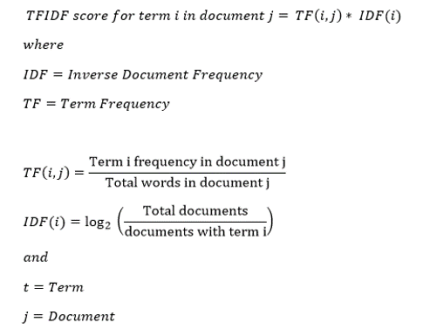

In [34]:
from IPython.display import Image
Image(filename=r"C:\Users\Praveen\Desktop\img\tfidf.png",width=400,height=400)

In [35]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

Model build on TFIDF corpus using LDA

In [36]:
lda_model_tfidf = gensim.models.ldamodel.LdaModel(corpus=corpus_tfidf,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=100,
                                           chunksize=1000,
                                           passes=10)

In [37]:
print('\nPerplexity: ', lda_model_tfidf.log_perplexity(corpus))

coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.7003599688074535

Coherence Score:  0.47445931393039636


In [38]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_tfidf, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.312942 -0.090443  1       1        75.239559
3      0.296518  0.050296  2       1        19.715111
2     -0.035189  0.192445  3       1        1.577047 
1     -0.111401 -0.079791  4       1        1.196662 
6     -0.155924 -0.064189  5       1        1.176297 
0     -0.159541 -0.003154  6       1        0.699537 
4     -0.147405 -0.005164  7       1        0.395787 , topic_info=           Term          Freq         Total Category  logprob  loglift
124   debt       15186.000000  15186.000000  Default  30.0000  30.0000
51    payment    15611.000000  15611.000000  Default  29.0000  29.0000
12    report     12734.000000  12734.000000  Default  28.0000  28.0000
373   statement  5855.000000   5855.000000   Default  27.0000  27.0000
84    credit     14320.000000  14320.000000  Default  26.0000  26.0000
...      ...              ...           ...      ...      ...      ...
3998  passenger  22.474719     29.631594     Topic7  -5.9937   5.2556 
2905  booking    21.617890     28.798422     Topic7  -6.0325   5.2453 
1872  redeem     26.384246     43.275348     Topic7  -5.8333   5.0372 
1608  resource   60.092398     364.750945    Topic7  -5.0102   3.7287 
3241  press      37.751675     140.356596    Topic7  -5.4750   4.2189 

[372 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2779  1      0.038451  aadvantage
2779  2      0.038451  aadvantage
2779  3      0.019225  aadvantage
2779  4      0.019225  aadvantage
2779  5      0.019225  aadvantage
...  ..           ...         ...
2108  2      0.981991  yrs       
2108  3      0.002897  yrs       
2108  4      0.002897  yrs       
2108  5      0.002897  yrs       
2108  6      0.002897  yrs       

[2049 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 3, 2, 7, 1, 5])

Above PyLda helps us to understand the topics and the 30 most associated words with topics. And also helps in evalute which model performed better.

TFIDF is slightly performed better than Bag of Words.

Using metrics: Perplexity and Coherence Scores.